# Jrfapp tutorial 1 
## Inverting a synthetic Model without noise:

First we need to import Initialize and Jrfapp_station. You can perform it by:

In [1]:
from jrfapp.main_classes import Initialize
from jrfapp.main_classes import Jrfapp_station
import os

let us start with a simple example. Before defining a station, you need to 
Define an Initialize object. This object gets information about your 
networks, stations, and models. You can find the description of the input parameters
in Initialize class doc. The doc is:

1. station_coordinate_file : str, optional
> The path to the station's coordinate file. This file must contain
> 3 columns (station name, station latitude, station longitude).
> Remove any header in the file. The default is '' for a synthetic run 
> without any noise. 
2. model_folder : str, optional 
> The full path to the folder containing initial models (model_folder)
> if not provided, code read model internally. 
> the default is ''. 
3. data_folder : str, optional
> Path to the folder containing the dataset. This folder must contain 
> subfolders with the name of the stations. Each station folder must 
> contain event folders with 3 waveforms for each component (ZNE). 
> An example for folders is
> {data_folder}/{station_folder}/{event_folder}/*BHZ.SAC *BHE.SAC *BHN.SAC
> data_folder/CHBR/2017119105924/2017119105924_BHE.SAC,
> data_folder/CHBR/2017119105924/2017119105924_BHN.SAC,  
> data_folder/CHBR/2017119105924/2017119105924_BHZ.SAC.
> The default is '' for synthetic without noise.
            
4. output_folder : str, optional
> Path to the output folder. The default is current_directory/outputs/.
5. model_name : str, optional
> Model name used in the inversion and synthetic generation.
> The model name can be 
> iasp91, sedimentary, continent, halfspace, or path to the model file.
> An example of a model file could be found at 
> /model_folder/*_model.dat. The default is 'iasp91'. 
> The file should be created according to this format
> MIN_DEPTH   MAX_DEPTH   VELOCITY    MAX_DEPTH_CHANGE_MIN    MAX_DEPTH_CHANGE_MAX    VELOCITY_CHANGE
> 0.0         20.0        3.36        -5                      5                       0.5
> 20.0        35.0        3.75        -5                      5                       0.5
> 35.0        120.0       4.47         0                      0                       0.5
> This is the IASP91 file. It means from 0.0 to 20.0 km, the velocity is 
> 3.36. The 20.0 km is the major boundary because the value of MAX_DEPTH_CHANGE_MIN and 
> MAX_DEPTH_CHANGE_MIN is defined. These values will be used in PSO and 
> mean initial model run. The maximum depth must be greater than 110.
        
6. layering: list, optional
> Define the number of layers according to the velocity model. 
> This is the initial number of layers, and all of the values are 
> crossed to a maximum value of ndivide_list in random grid search and PSO run.
> The layering is applied according to the velocity model. 
> The layers which have MAX_DEPTH_CHANGE_MIN or MAX_DEPTH_CHANGE_MAX 
> in the velocity model are considered to be reference velocity changes. 
> The default values of layering for IASP91 are [2, 3, 3], which means 
> 2 layers from 0.0 to 20.0 km, 3 layers from 20.0 to 35.0 km, 
> and 3 layers from 35.0 to 70 km. Thus, the length of the list 
> you provided here must be number_of_major_boundary + 1.
> The default 'default' for the layering is [3, 4, 3] for an input 
> model defined by the user or halfspace, [4, 2, 3] for IASP91, [2, 3, 3] for sedimentary, 
> and [4, 3, 3] for the continent model.

7. force_layer_info: list, optional
> If you want to define a specific parameters model you can define
> it is here. This is useful when you estimate a velocity model for a 
> station and observe many fluctuations in several parts of the model. This
> Fluctuation means that those parts of the model are overparameterized. 
> This is also useful when you want to increase the number of layers in 
> a specific part of the model. The definition is as follows
> [ [initial_depth1, final_depth1, nlayer1],  
> [initial_depth1, final_depth1, nlayer1], ...]
> For example, 
> force_layer_info = [[0, 15, 3], 
>                    [15, 35, 3], 
>                    [35, 45, 2], 
>                    [45, 70, 2]]
> means that you want to have 3 layers betwen 0 to 15 km, 
> 3 layers from 15 to 35 and so on and so forth. 
> The default is None for not forcing any layer_info and calculate
> layer_info from layering.

8. gauss_width : double, optional
> Gaussian width is used in RF calculation. The default is 3.5.

9. nsamp : int, optional
> Number of samples per trace in inversion. The default is 2048.

10. dt: double, optional
> Delta time of traces. ALL DATA WILL BE DECIMATED TO THIS VALUE.
> The default is 0.05.

11. inv_bf: double, optional
> Time before P's arrival for the start point of RF time series inversion.
> The default is 2.0.

12. inv_af : double, optional
> Time after P's arrival for the start point of RF time series inversion.
> The default is 45.

13. filter_periods: str or list, optional
> Filter list used in apparent velocity calculation. You can assign it by
> giving a list such as [min, max, step]. 
> The default is 'default'.

14. network_name: str, optional
> Your network name. The default is 'default'.

15. app_weight: double, optional
> Apparent velocity weight in inversion. The default is 5.

16. rf_weight: double, optional
> RFR weight in inversion. The default is 2.5.

17. smooth_fac: double, optional
> Smoothing factor. The default is 1.00.

18. damp_fac: double, optional
> Damping factor. The default is 0.5000.

19. kind: str, optional
> 'real' for real data run and 'synthetic' for a synthetic run. The default is 'synthetic'.

20. freq_min_bpfilt: double, optional
> Minimum frequency of Butterworth filter applied to the real dataset.
> The default is 0.05.

21. freq_max_bpfilt: double, optional
> The maximum frequency of the Butterworth filter applied to the real dataset.
> The default is 2.5.

22. min_app_vel : double, optional
> The minimum value of apparent velocity used in filtering bad RF before
> stacking. 
> The default is 1.5.

23. max_app_vel: double, optional
> The maximum value of apparent velocity used in filtering bad RF before
> stacking. 
> The default is 5.00.

24. max_depth: float, optional
> Define the maximum depth of the model. It must be at least 40 km 
> less than the maximum depth defined in the velocity model.
> The default is 70.00.

25. vp_to_vs : float, optional
> Define the ratio of compressional velocity to shear velocity.
> The default is 1.732.

26. slowness: float, optional
> The slowness that will be used for creating a synthetic model. 
> This will be ignored for real data inversion or when a synthetic model
> created with the real dataset RFs with noise.
> The default is 0.04.

27. random_seed: int, optional
> random_seed for repeating the same results in different runs.
> This should be an integer. 
> The default value is None for not giving any strict
> random seed. 

<div class="alert alert-block alert-info">
<b>Tip:</b> You dont need to define all the parameters above. All parameters have a default value. 
    For a simple run you can initialize the code as follow:
</div>

In [2]:
init_obj = Initialize(model_name= 'halfspace',
        output_folder='/home/soroush/rf_shallow_codes/makran_data/pkg_test', 
        gauss_width= 3.5)

Here we defined a basic Initialize object with a "halfspace" model. The 
output folder for this run can be found at init_obj.output_folder 
For example we can 

In [3]:
print(init_obj.output_folder)

/home/soroush/rf_shallow_codes/makran_data/pkg_test


In the next step we want to petrub my initial model, a "halfspace" model.
To do so, we need to define a list that contains the depth ranges we want 
to perturb and the perturbation value. we can define this list as follow:

In [4]:
which_to_pert = []
which_to_pert.append([6, 12,  -0.6])
which_to_pert.append([18, 24,  0.6])
which_to_pert.append([30, 36, -0.6])
which_to_pert.append([50, 60,  0.6])

This list means changing the velocity of the initial model in 6-12 km by -0.6, 
Change the velocity of 18-24 km depth by 0.6, change the velocity of 30-36 km 
by -0.6, and change the velocity of 50-60 km depth by 0.6. 
Now you need to feed this list to init_obj to create your synthetic model.
We can do this by:

In [5]:
init_obj.create_synthetic(which_to_pert)

#### We can plot our initial and synthetic models by:

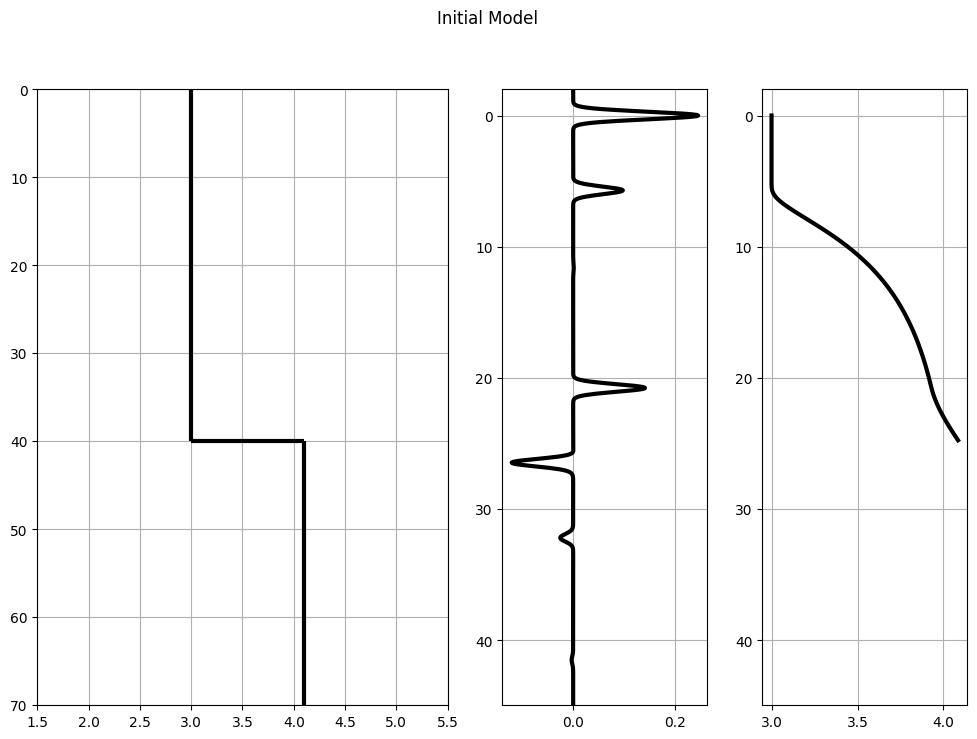

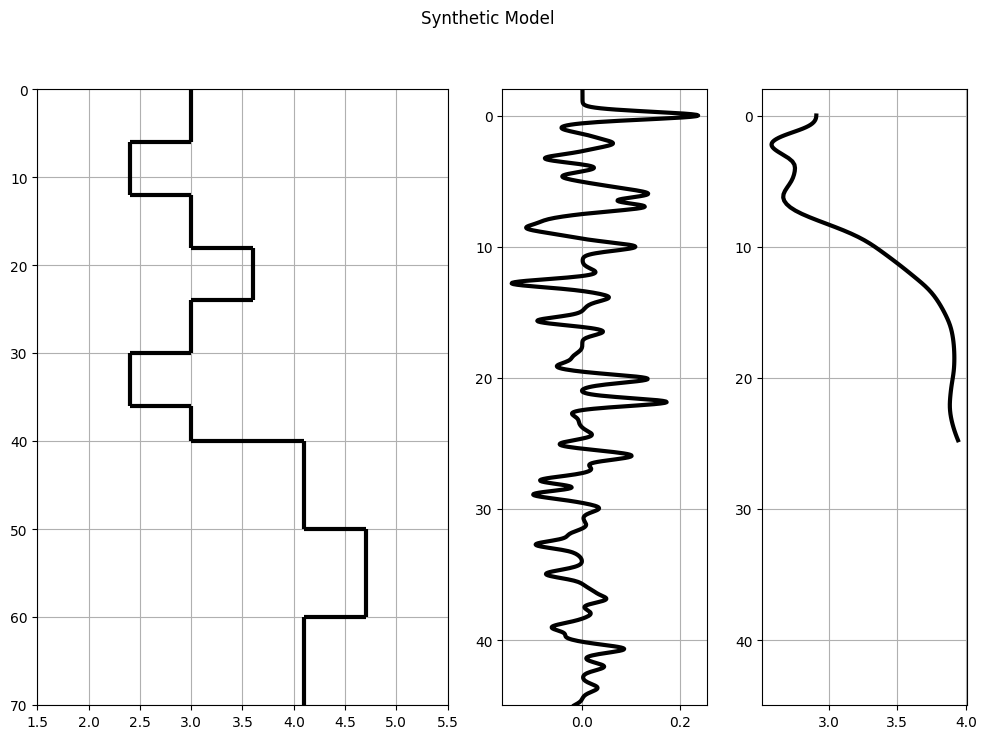

In [6]:
init_obj.plot_model('initial')
init_obj.plot_model('synthetic')

To this step we define the parameters required for the Jrfapp_station 
class. Jrfapp_station class is the main class of the code. We can create 
Jrfapp_station object by:
The Jrfapp_station parameters documents can be found in this class doc string. The doc is:

1. init_obj : TYPE = Initilize.
> The Initilize object.

2. name : TYPE = str
> station name. If the station name couldnt be found in the 
> init_obj.st_name created according to the coordinate input
> file, this station was considered the synthetic station. Thus, 
> you can create a station with an arbitrary name for example "synthetic"
> for a synthetic run, otherwise, this station is considered as the 
> real station.

3. noise_level : TYPE = float, optional
> If you provide a value greater than zero in noise level, This station 
> will be considered as a synthetic station. In this scenario, if the name
> you provided matches one of the station names in your station_coordinate_file
> provided in the Initilize, the code will use the data from this station.
> otherwise, if the name doesn't match any station in your station_coordinate_file
> code will create a synthetic station with the noise_level you provided. 

4. save_data : TYPE = bool, optional
> True for saving data. The default is True.

5. save_rf : TYPE = bool, optional
> True for saving Receiver functions. The default is True.

6. force_load_data : TYPE = bool, optional
> True for reading data from previously saved data. The default is False.

7. force_load_rf : TYPE = bool, optional
> True for reading RFs from previously saved RFs. The default is False.

8. close_fig : TYPE = bool, optional
> True for closing figures created after the definition of the station.
> Don't change this to False unless you want to review your RFs and 
> app_vel calculated for this station. Changing this to False when 
> creating several stations could result in memory. 
> overload. 
> The default is True.

In [7]:
jrfapp_stobj = Jrfapp_station(init_obj, name = 'synthetic', 
                                  noise_level= 0.0)

we fed the Initialize object to Jrfapp_station and created a station with the
name "synthetic" without noise level in the data. When we create a synthetic
station, the noise level will greatly influence the observation because there 
is no stacking involved.  
We can invert the RFs and Apparent velocity of the synthetic model with two 
different method i.e., "grid_search" and "PSO". 

It is very good practice to save the jrfapp_stobj before performing an inversion. This way you can always load the file and 
perform inversion again. you can save jrfapp_stobj by:

In [8]:
jrfapp_stobj_file_name = jrfapp_stobj.save_file(file_name= 'syn_no_noise_gs_bf_inv')

Saved to /home/soroush/rf_shallow_codes/makran_data/pkg_test/syn_no_noise_gs_bf_inv


dividing layers to 1
Runing with initial smoothing and damping factors. 
 smooth factor is :1.0 damp factor is : 0.5
dividing layers to 1
Runing with initial smoothing and damping factors. 
 smooth factor is :1.0 damp factor is : 0.5
dividing layers to 1
Runing with initial smoothing and damping factors. 
 smooth factor is :1.0 damp factor is : 0.5===============================================
dividing layers to 1
Runing with initial smoothing and damping factors. 
 smooth factor is :1.0 damp factor is : 0.5
dividing layers to 1
Runing with initial smoothing and damping factors. 
 smooth factor is :1.0 damp factor is : 0.5

dividing layers to 1
Runing with initial smoothing and damping factors. 
 smooth factor is :1.0 damp factor is : 0.5
dividing layers to 1
Runing with increased smoothing and damping factors. 
 smooth factor is :1.2 damp factor is : 0.55
dividing layers to 1
Runing with increased smoothing and damping factors. 
 smooth factor is :1.2 damp factor is : 0.55
dividing l

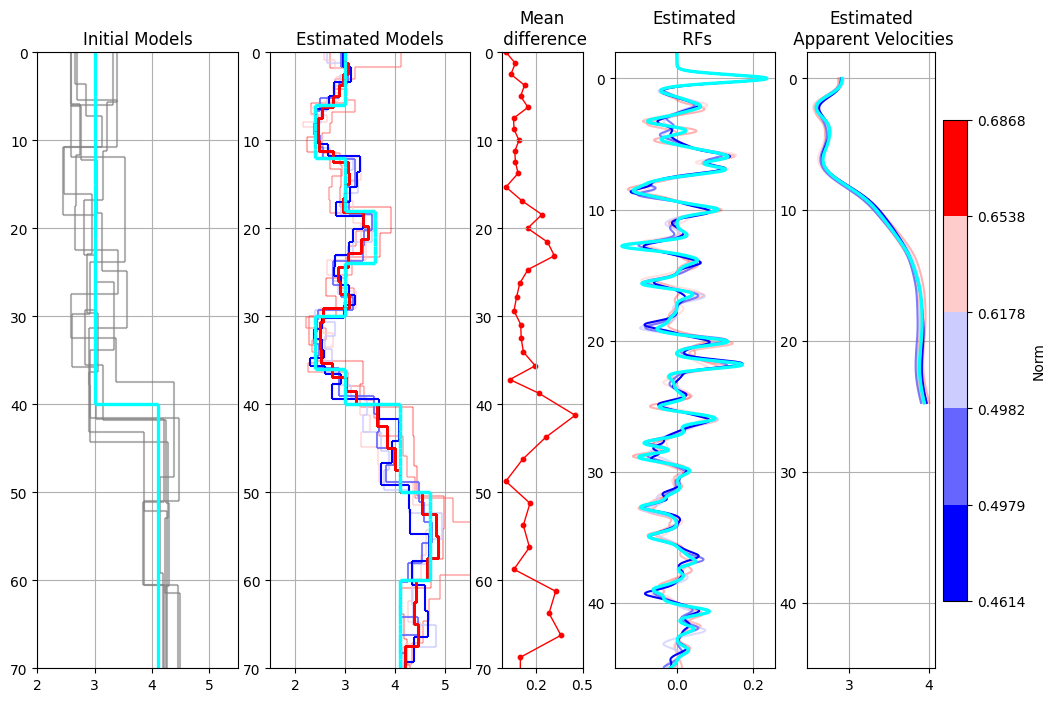

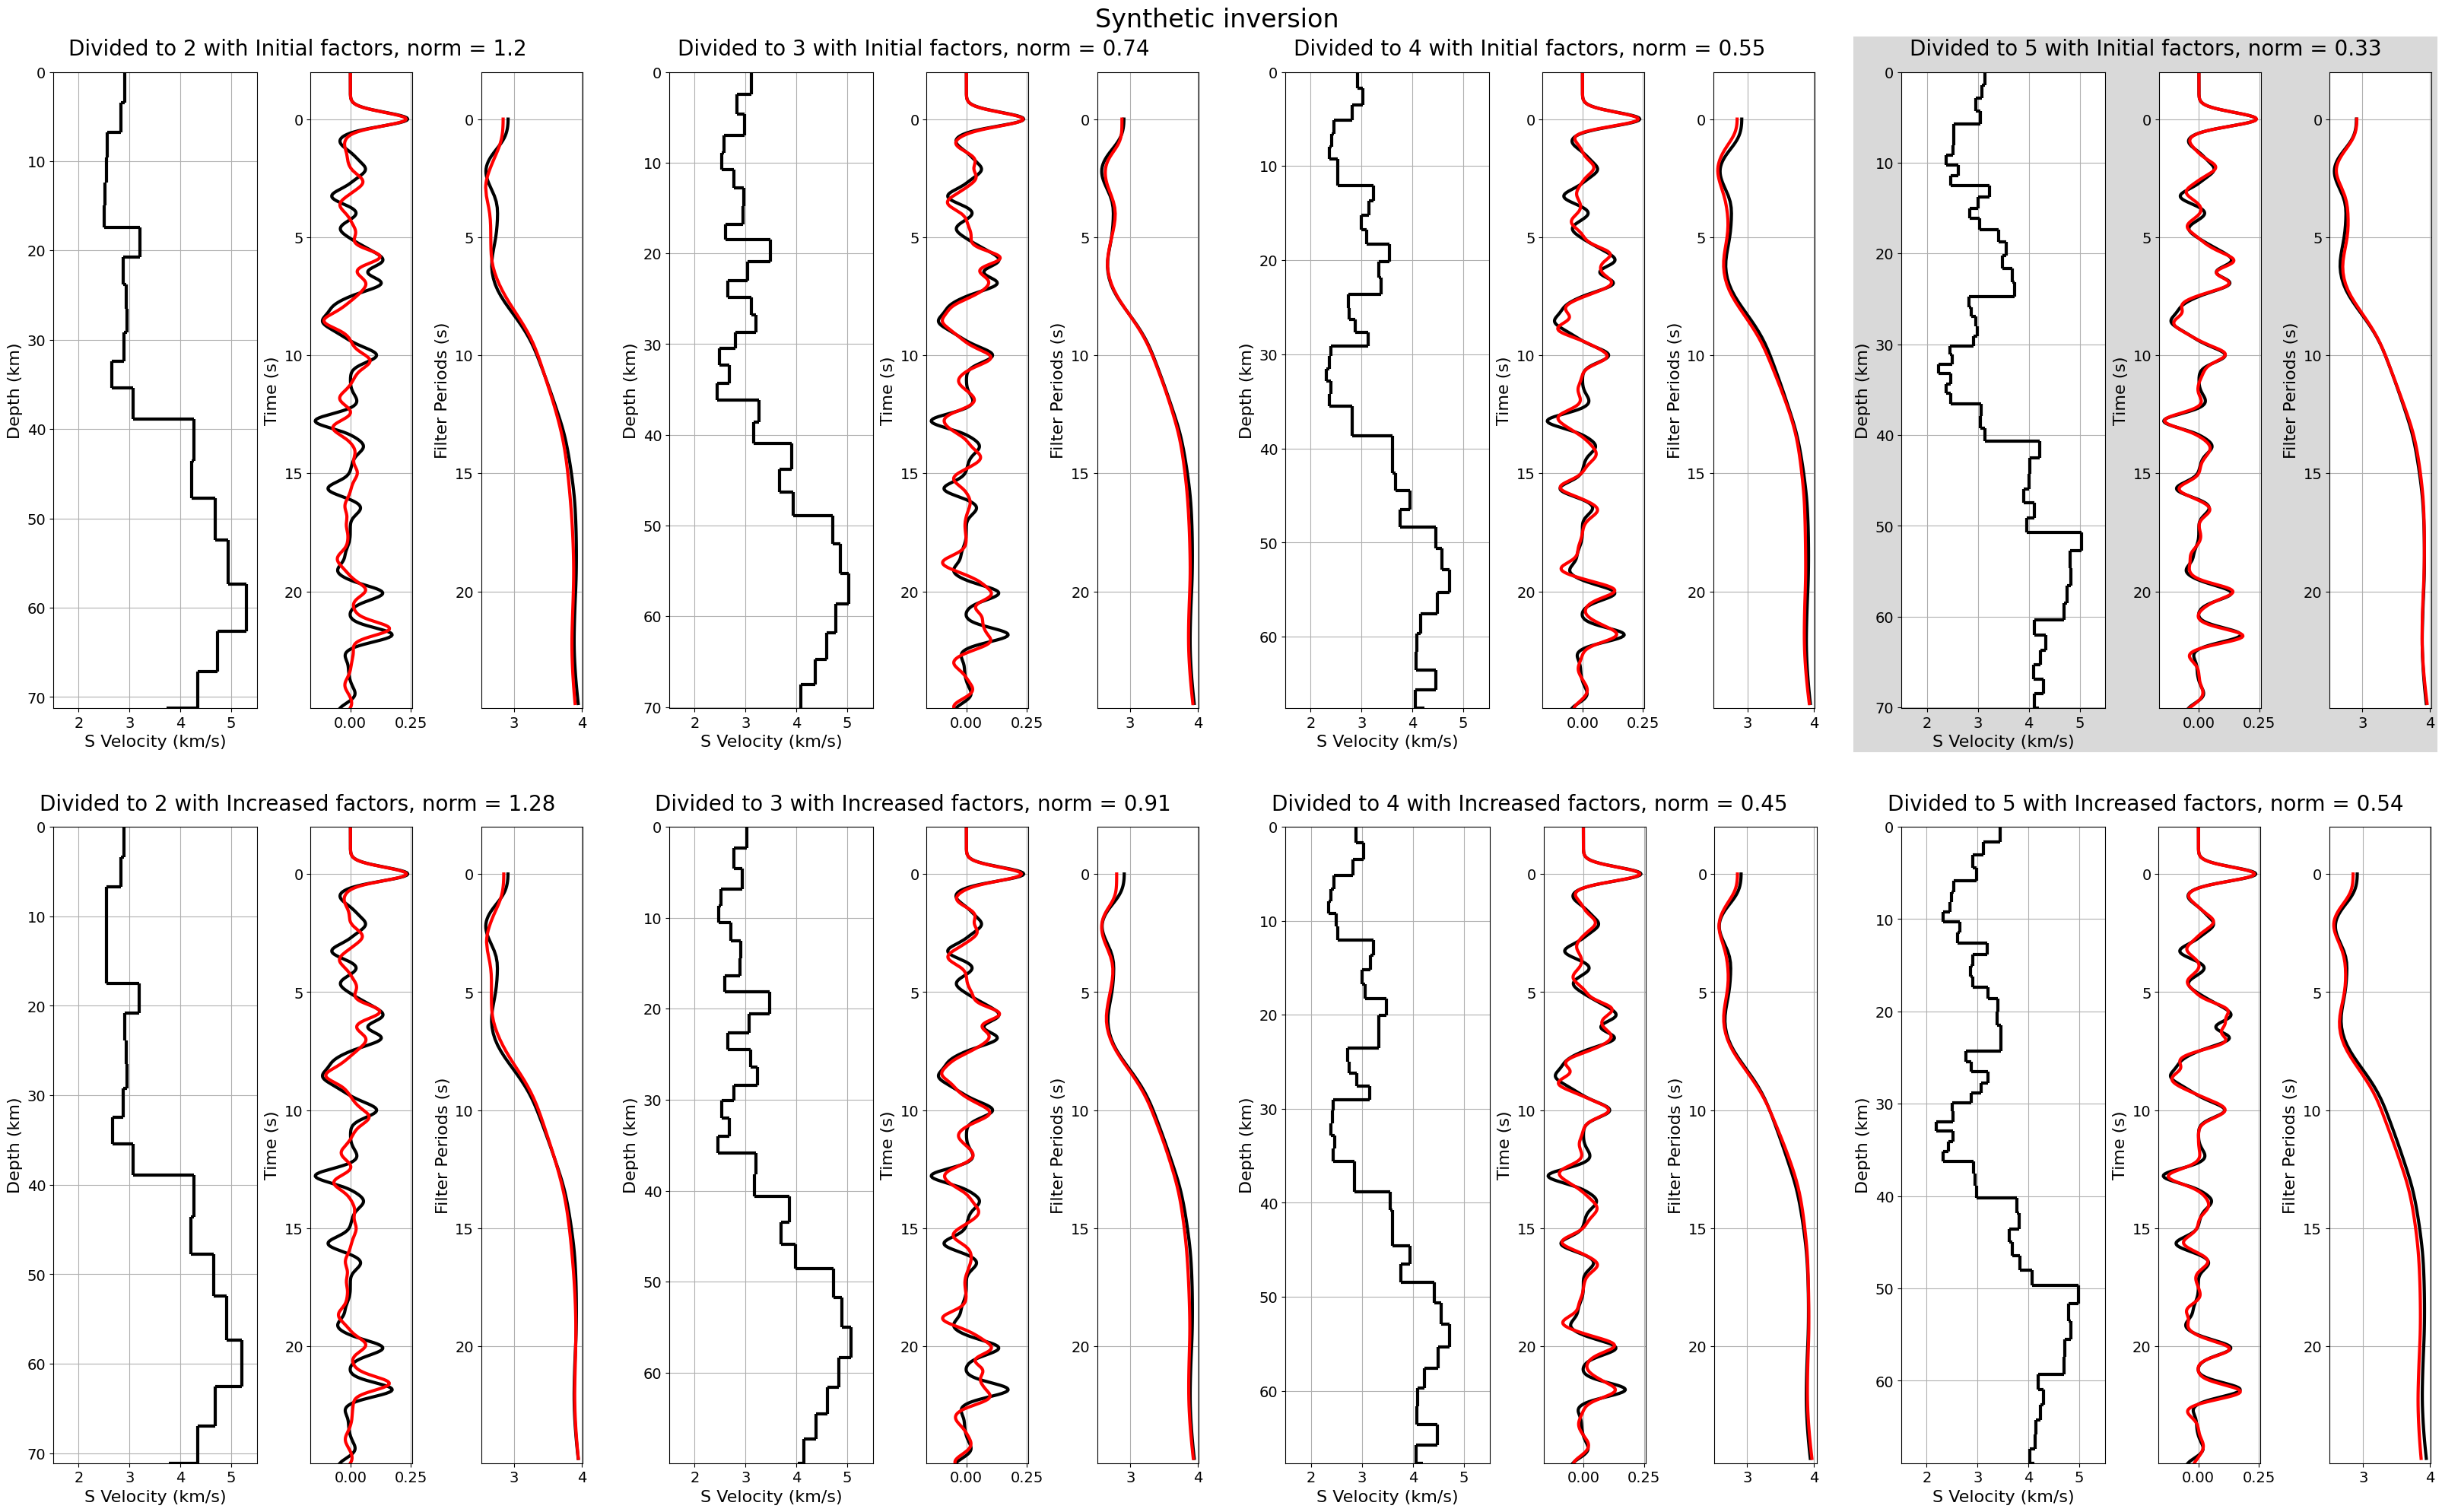

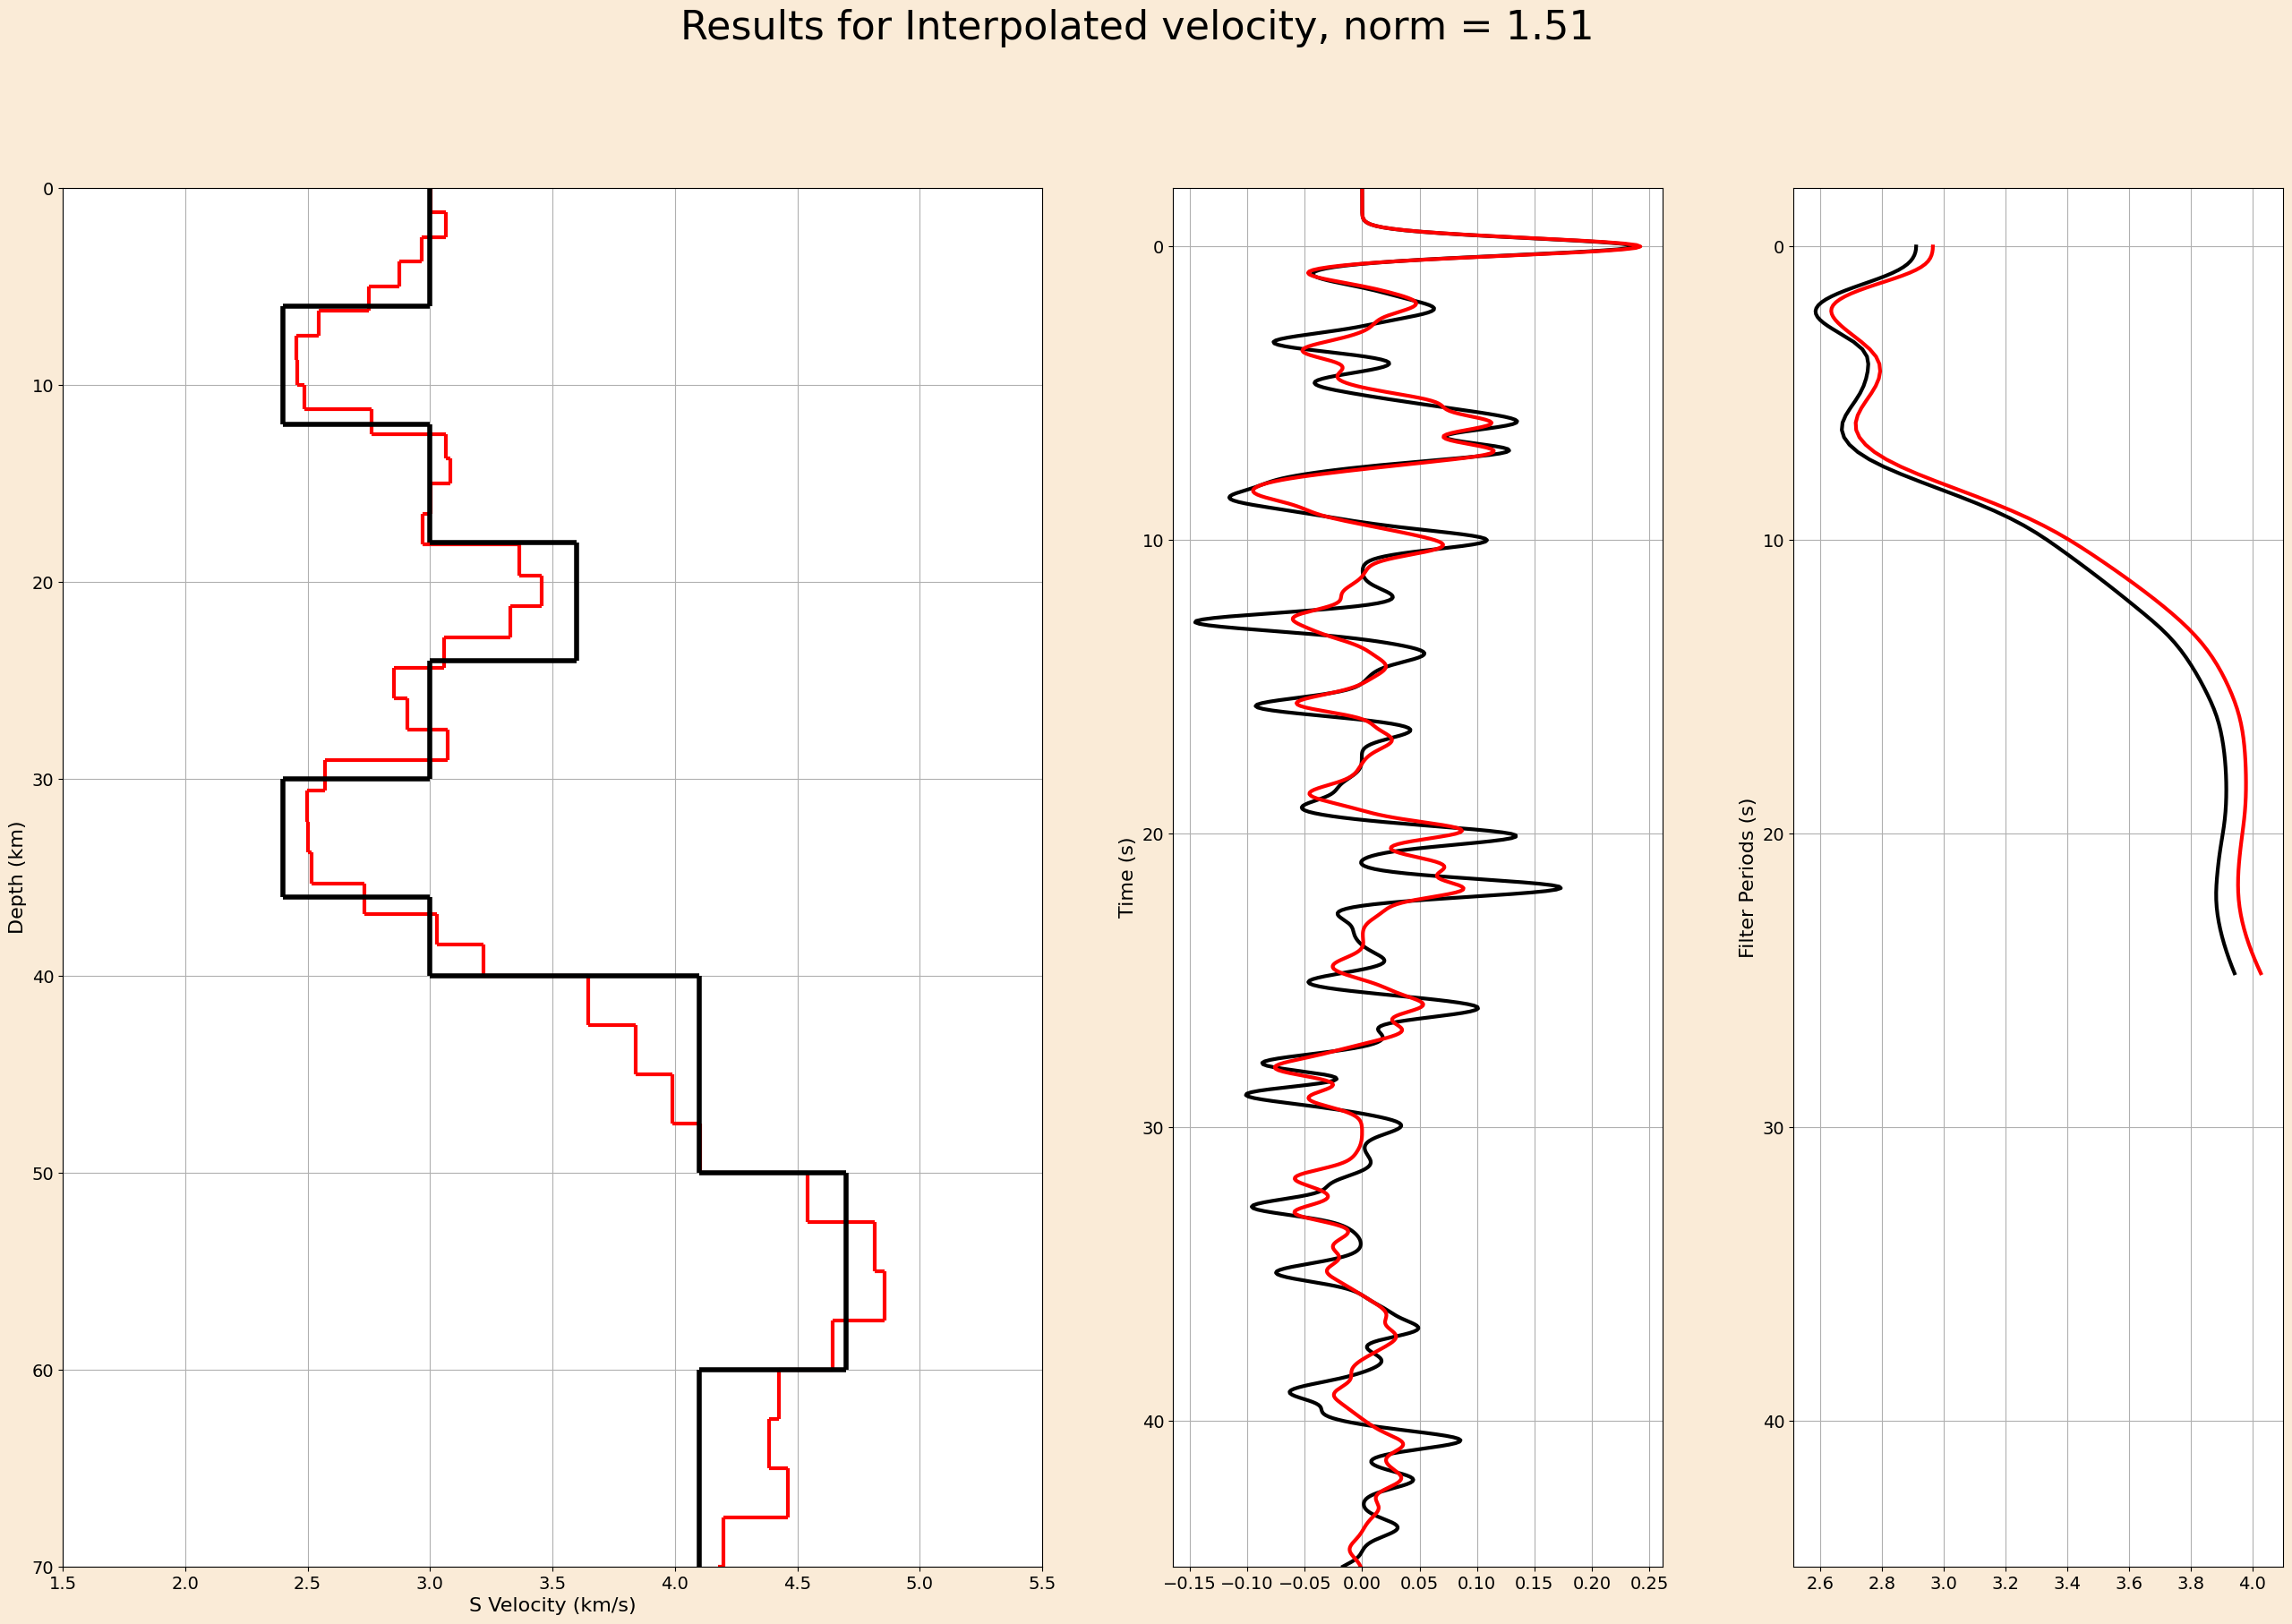

In [9]:
jrfapp_stobj.invert_data(inv_method = 'grid_search',
                 stack_name = 'synthetic',
                 ndivide_list = [-1, 1, -2, 2, -3, 3, -4, 4],
                 finer_ndivide= [-2, 2, -3, 3, -4, 4, -5, 5],
                 nmodel = 6, nthread = 6)

The above line fed the arguments for synthetic inversion for this station.
ndivide_list is the list that defines how many times we want to break
layers into smaller layers. The layering information can be found at 
init_obj. ndivide_list = [-1, 1, -2, 2, -3, 3, -4, 4] means that
we want 8 iterations in which we divide the number of layers into 1, 2, 3, and 4. 
The minus sign means inverted data with initial smoothing and damping factor, 
and the positive sign means inverted data with increased value for these factors. 
we chose the "grid_search" method and with "synthetic" in the stack name we imply 
that this is a synthetic inversion. The number of models is defined as how many 
models are tested for grid_search. This should be at least 200 models. However, 
for the sake of short runtime in this tutorial, here I choose 6 models and 6 threads. 
The number of threads should be smaller than your maximum number of threads. 
The program first searches through a random model defined according to the
initial model inputs and finds the mean estimated shear velocity in each
layer. Then the model which produces shear velocities with the smallest
difference with mean estimated shear velocity is chosen as the best model 
of the grid search. The last step runs the inversion with this model with 
finder_ndivide. for example, in the above example, the chosen model from 
grid search will be inverted with layer division of 2, 3, 4, and 5 with initial 
(for minus sign) and increased factors (plus sign).

<div class="alert alert-block alert-success"> On the success run, you can see the runtime for the code. 
The run time for an i5-gen5 with 12 Gb ram was 954 seconds. </div>

You can plot the inversion results by:

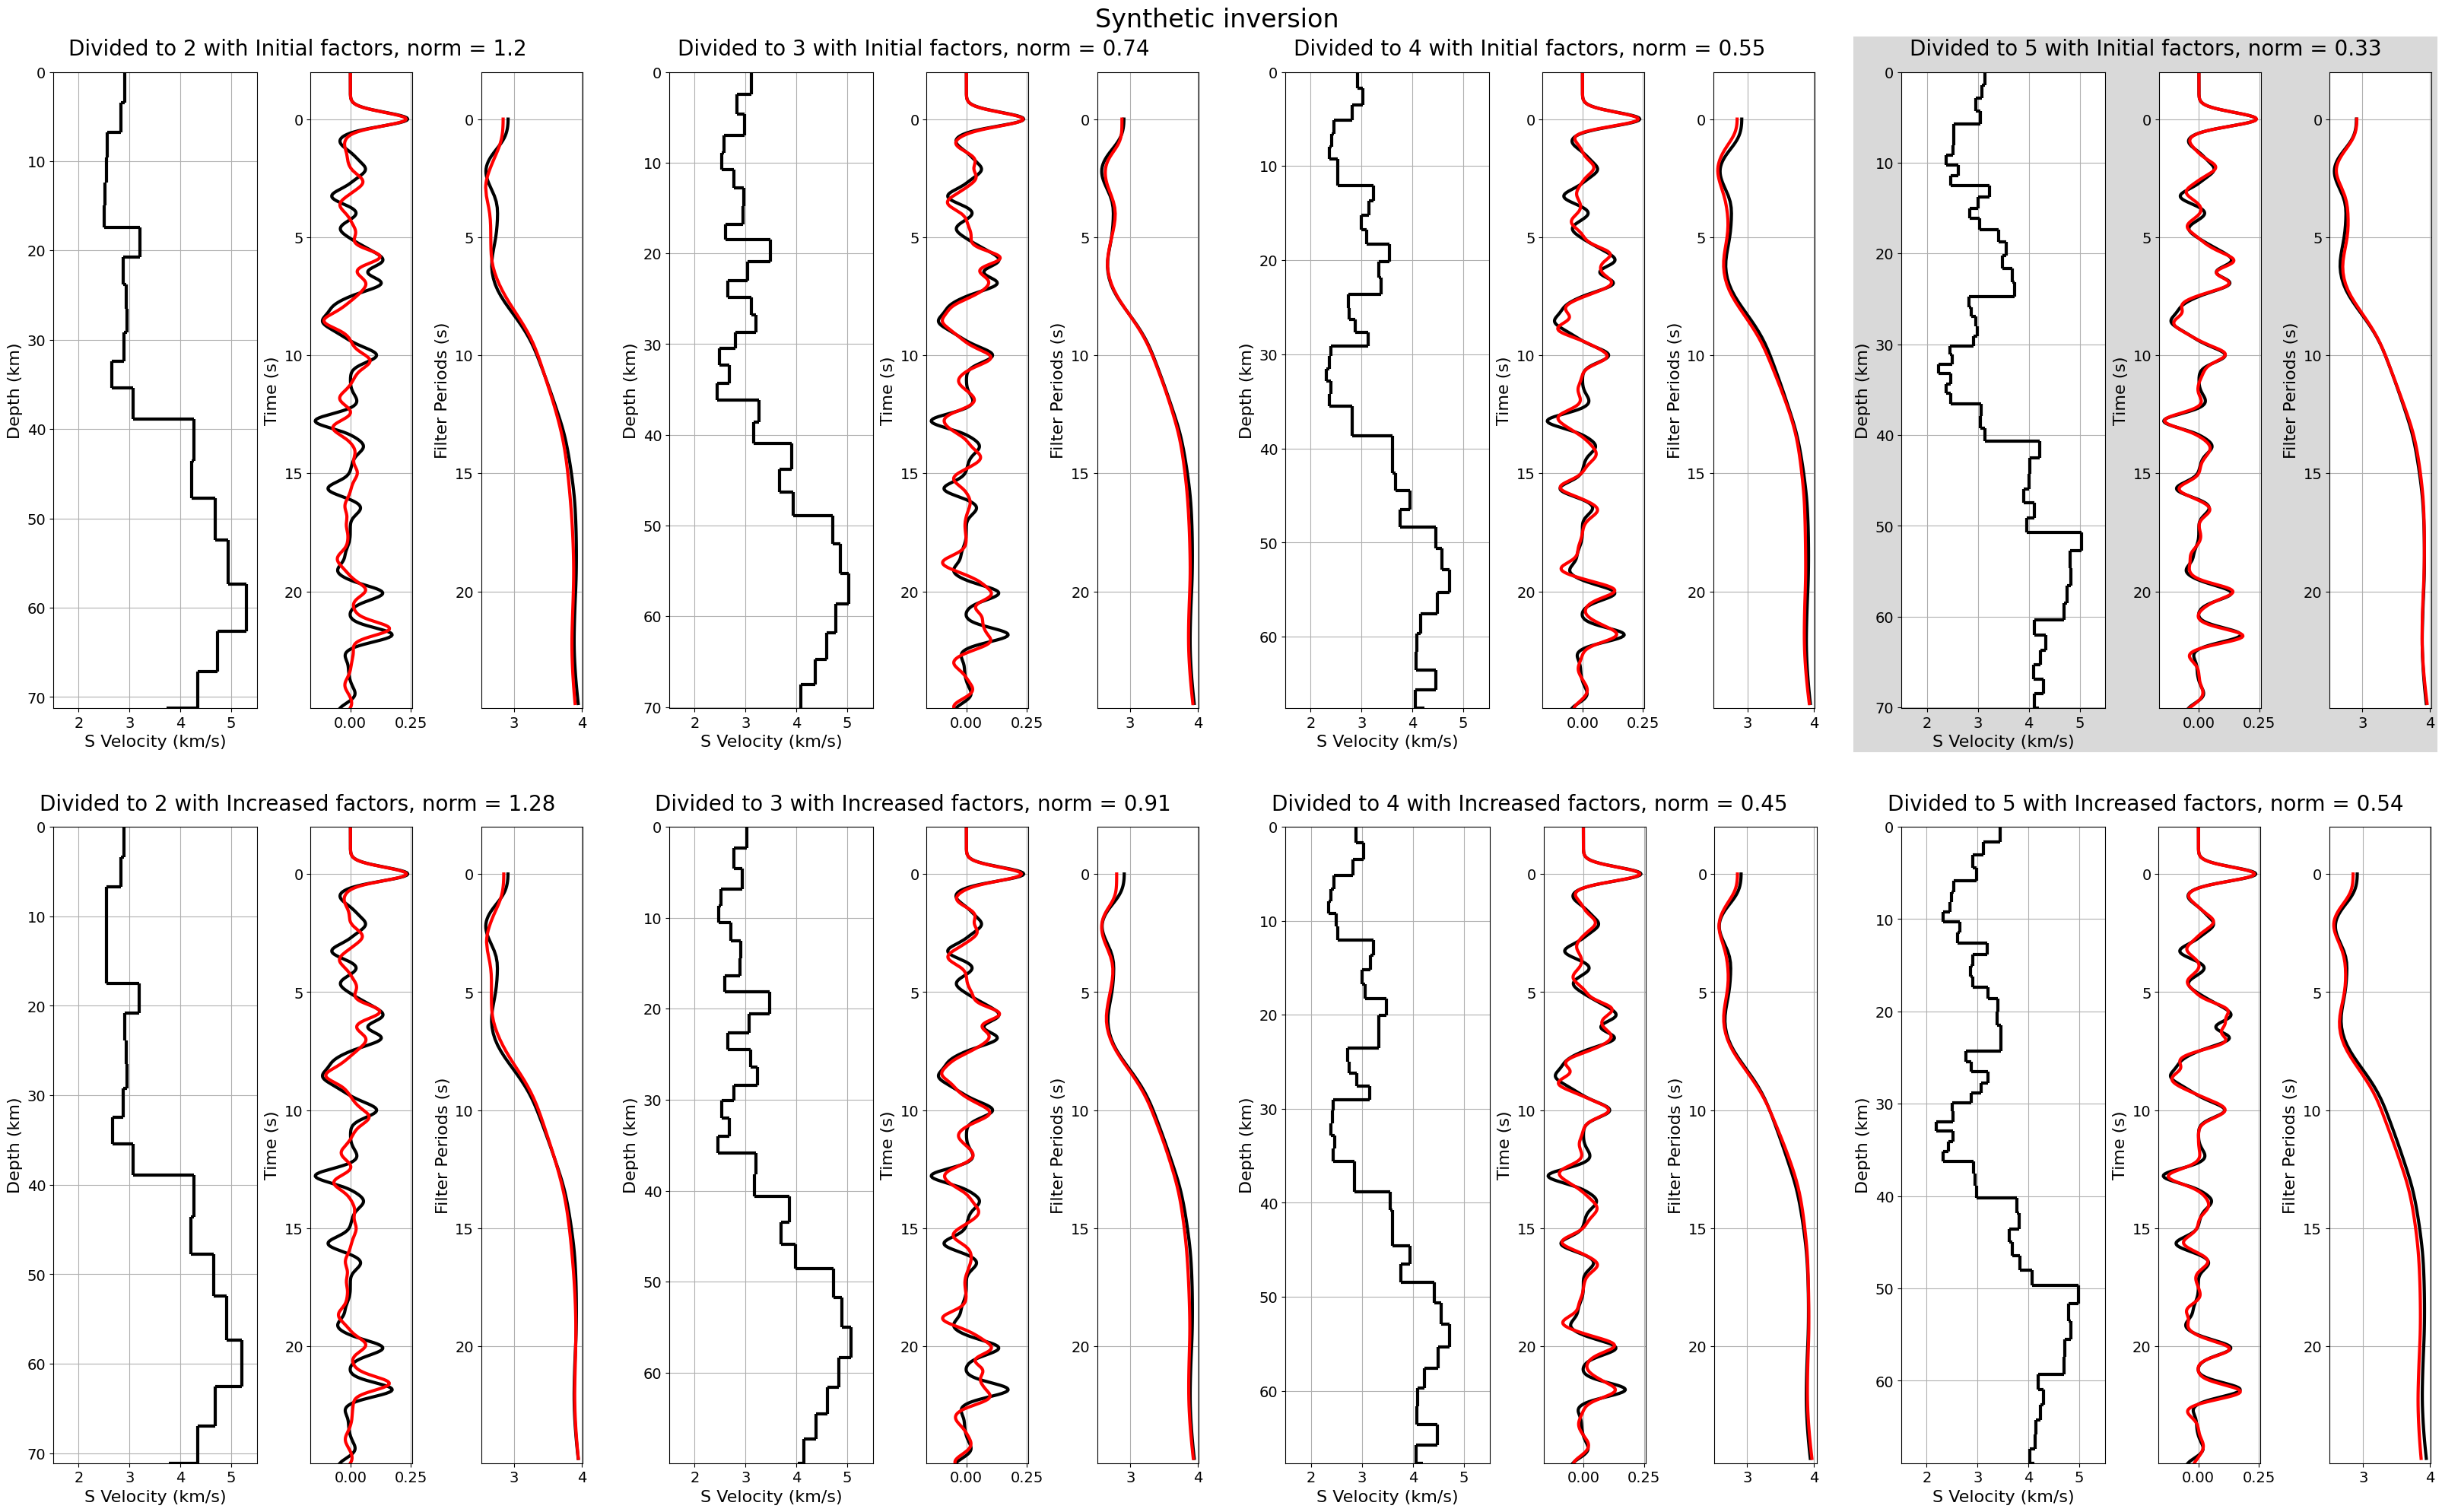

In [10]:
jrfapp_stobj.plot_results(fig_name= 'GS_out.png')

This figure that represent the estimated shear velocity model for the chosen model from random grid search.

all the grid search models and inversions will be saved into the 
init_obj.output_folder/synthetic. You can also save the Jrfapp_station object
by with specific filename. 

In [11]:
jrfapp_stobj_file_name = jrfapp_stobj.save_file(file_name= 'syn_no_noise_gs_af_inv')

Saved to /home/soroush/rf_shallow_codes/makran_data/pkg_test/syn_no_noise_gs_af_inv


The bin file then can be read by pickle, for example:


In [13]:
import pickle
jrfapp_stobj_file_name = '/home/soroush/rf_shallow_codes/makran_data/pkg_test/syn_no_noise_gs_af_inv'
with open(jrfapp_stobj_file_name, 'rb') as f1:
    jrfapp_stobj = pickle.load(f1)

Next, let's do the inversion with the "PSO" method. The number of particles (PSO_nparticle) and number of maximum iterations of PSO (PSO_maxiter), define the goodness of sudo-initial model. 30 particles in 15 iterations should do 
the job for most purposes, however, I choose 4 particles in 2 iterations for 
the sake of short runtime in this tutorial.

Starting PSO algorithm, Please wait...
Particle created with boundary = [13.372799986122482, 40.9357748357954]
 with energy = 0.3885871548479974
Particle created with boundary = [11.139045993204233, 42.47880822719191]
 with energy = 0.4875226731538864
Particle created with boundary = [14.17022004702574, 42.20324493442158]
 with energy = 0.4095235141575355
Particle created with boundary = [15.163986277024462, 40.7066758686814]
 with energy = 0.4637024690018863
======== iter 1 from 3===============
new gbest assigned with reduction= 0.7869560465516322
final obj is = 0.3885871548479974 initial was = 0.4937850805654902
initial boundary was: [15.0, 40.0]
new boundary is: [13.372799986122482, 40.9357748357954]
current iteration is :1
The boundary for this particle before update was: [13.372799986122482, 40.9357748357954]
the energy was: 0.3885871548479974
current gbest is :[13.372799986122482, 40.9357748357954]
current pbest for this particle is :[13.372799986122482, 40.9357748357954]
bounda

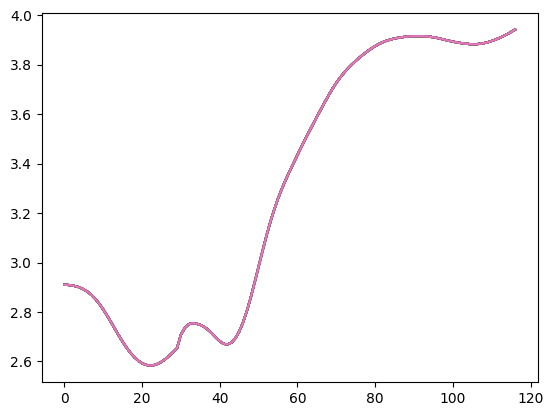

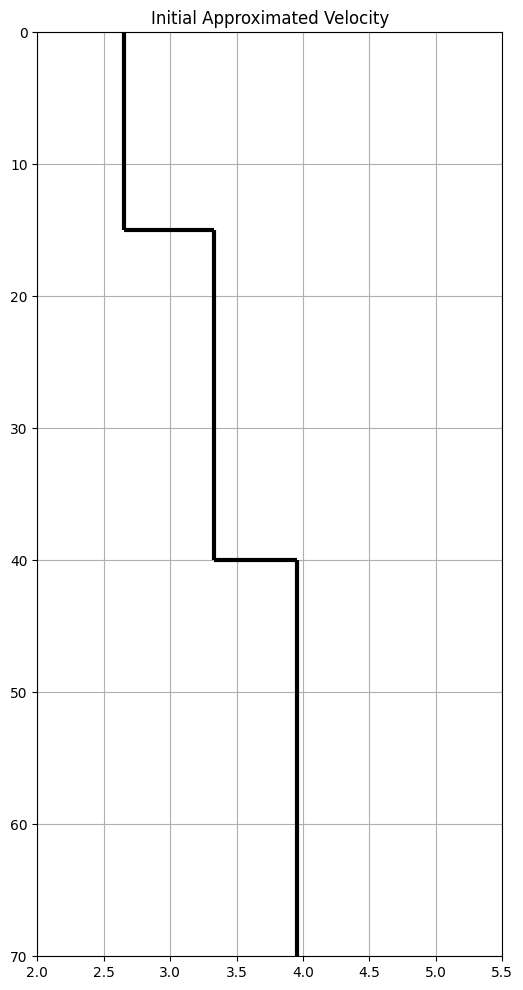

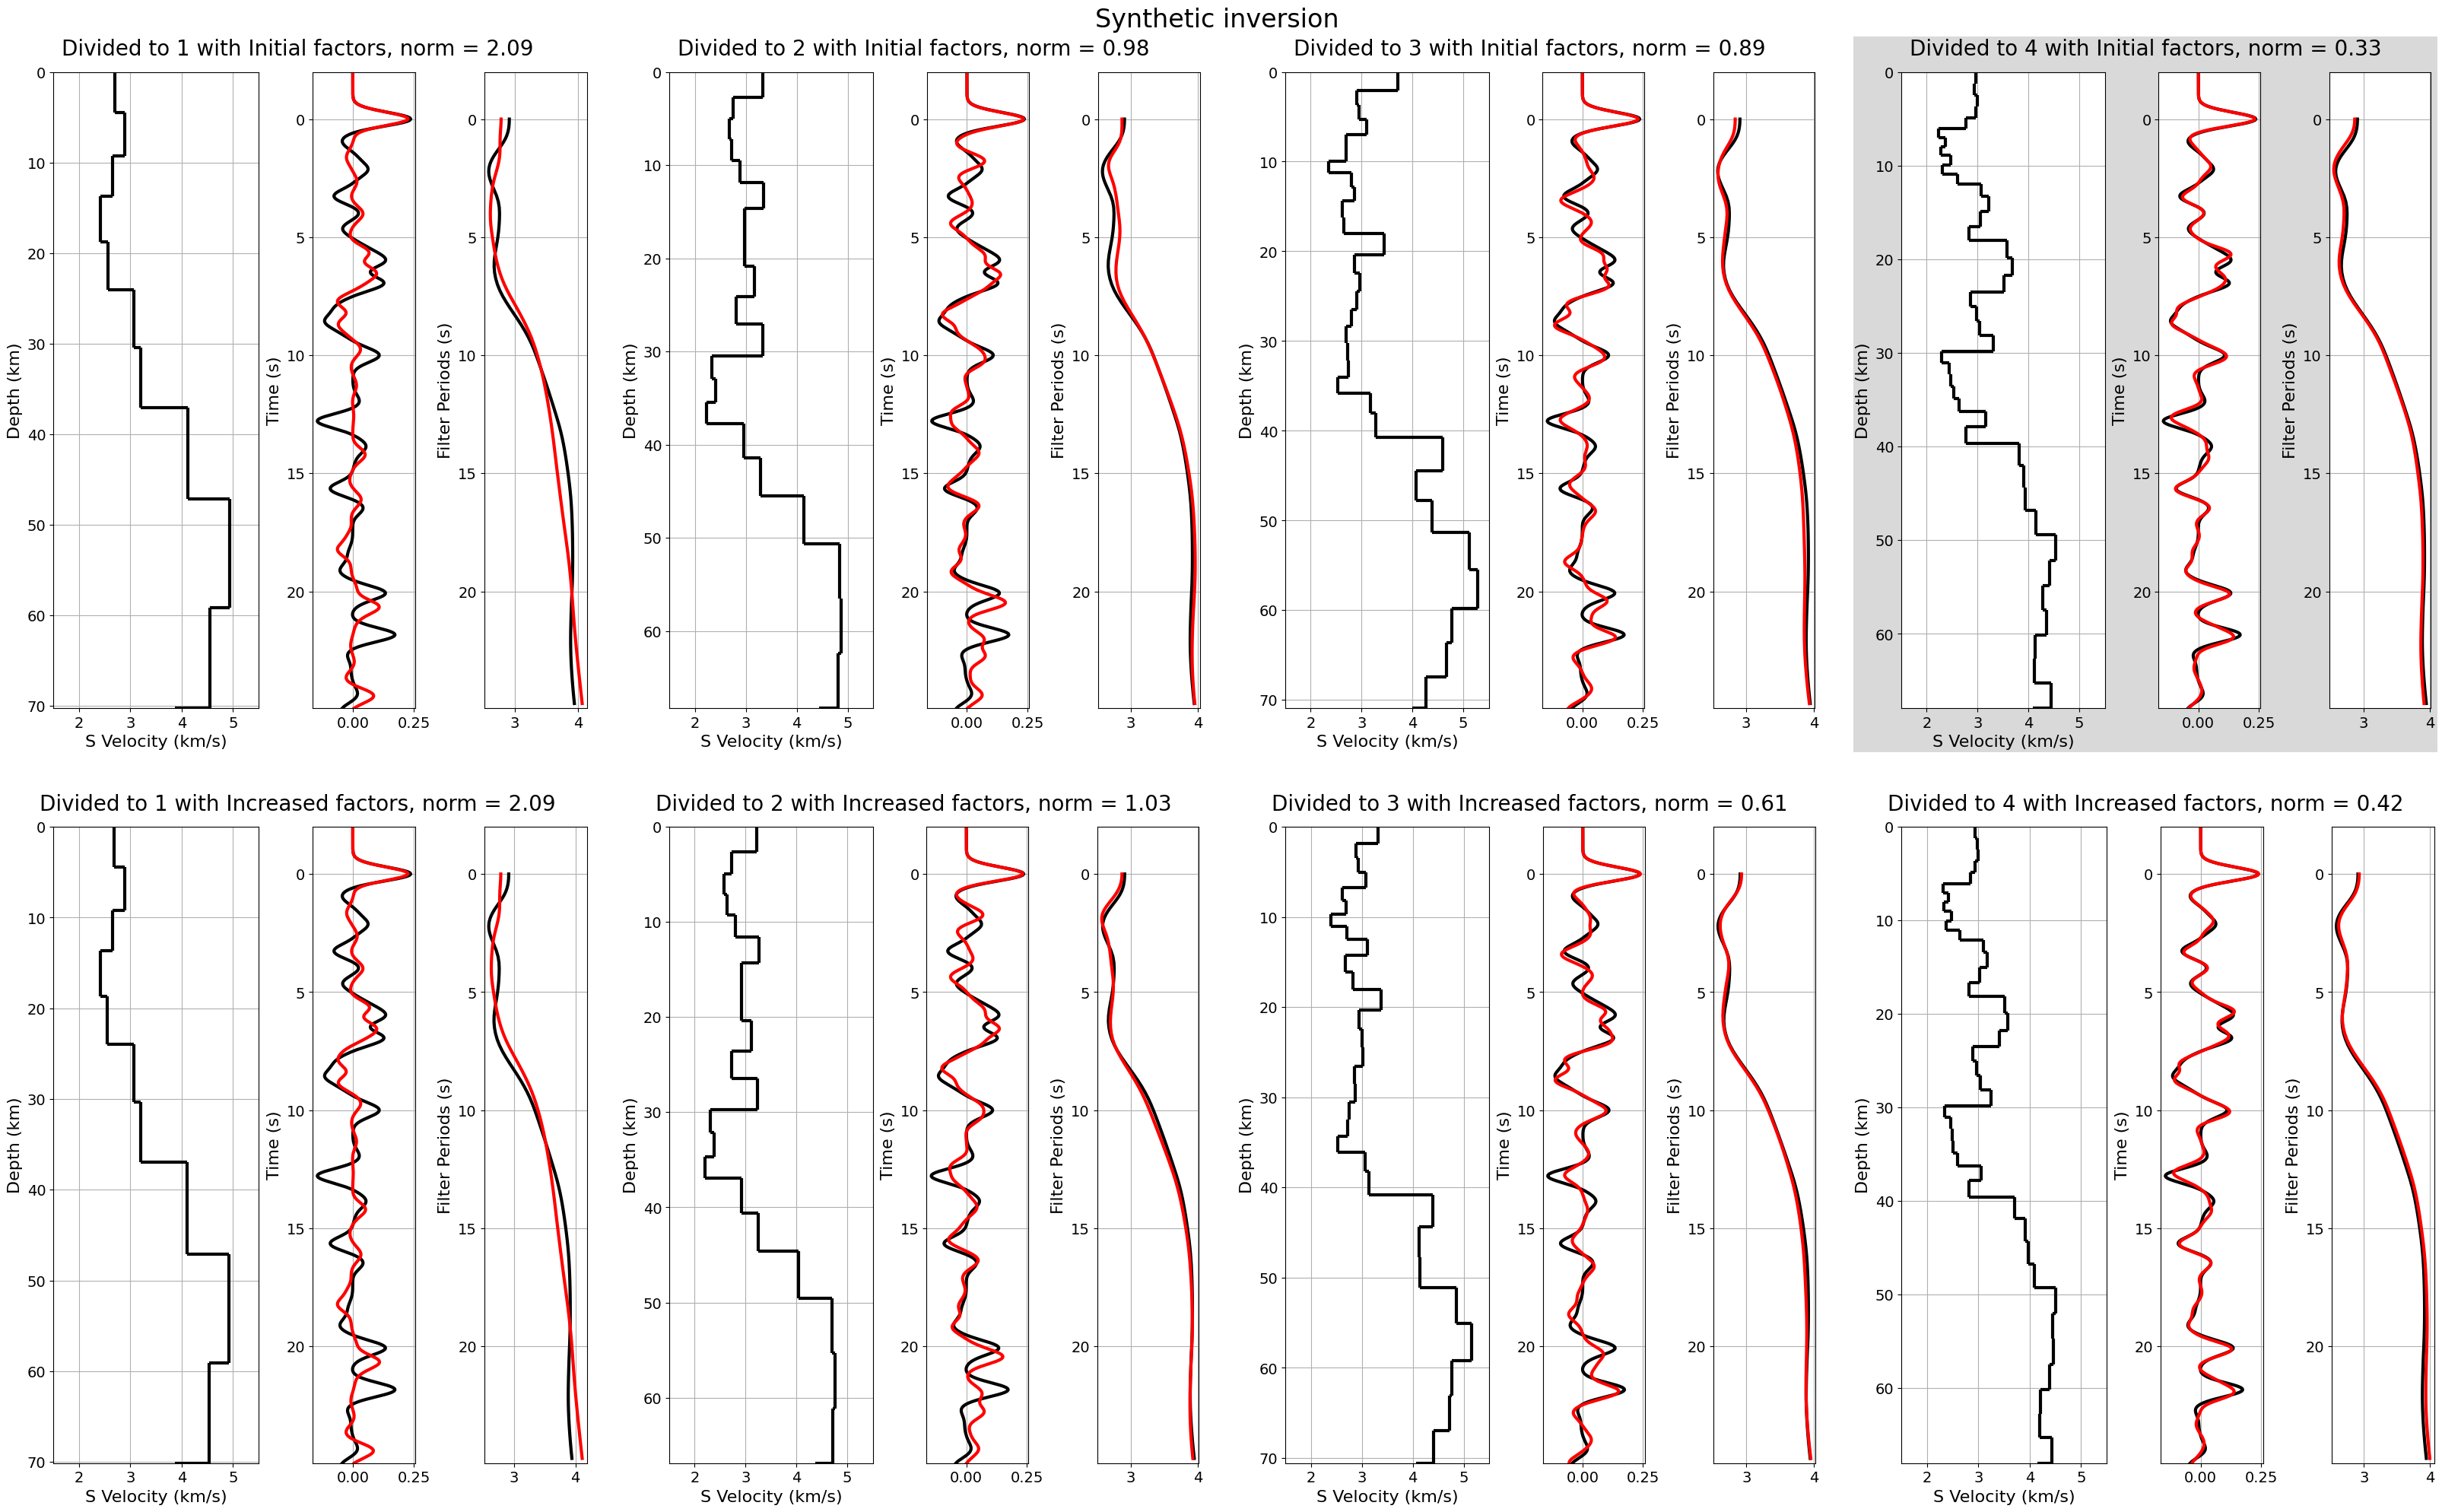

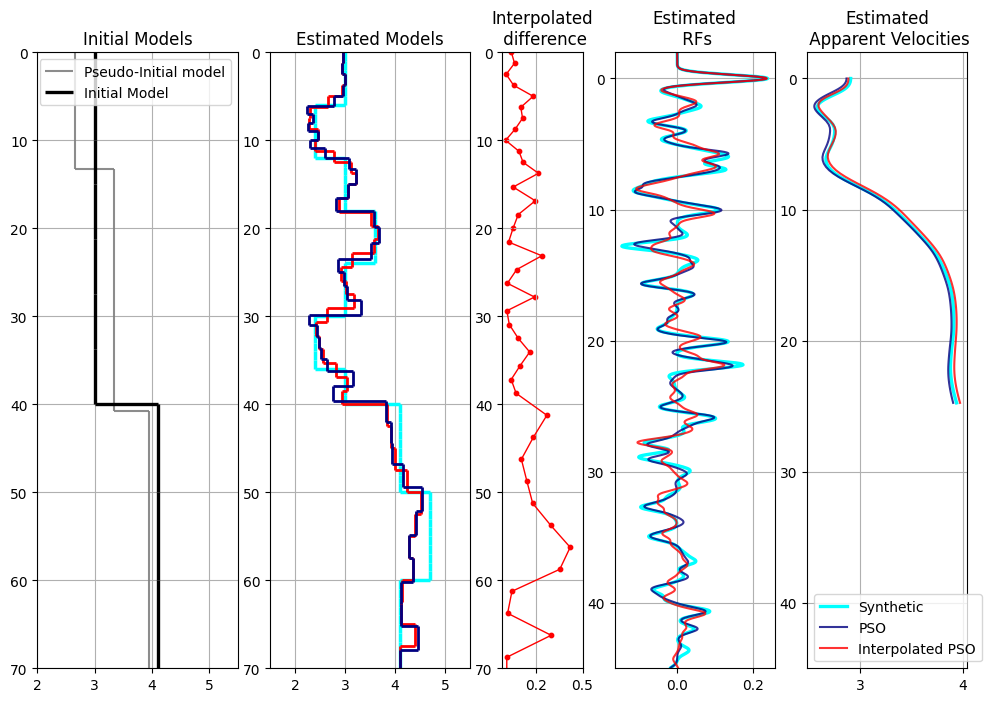

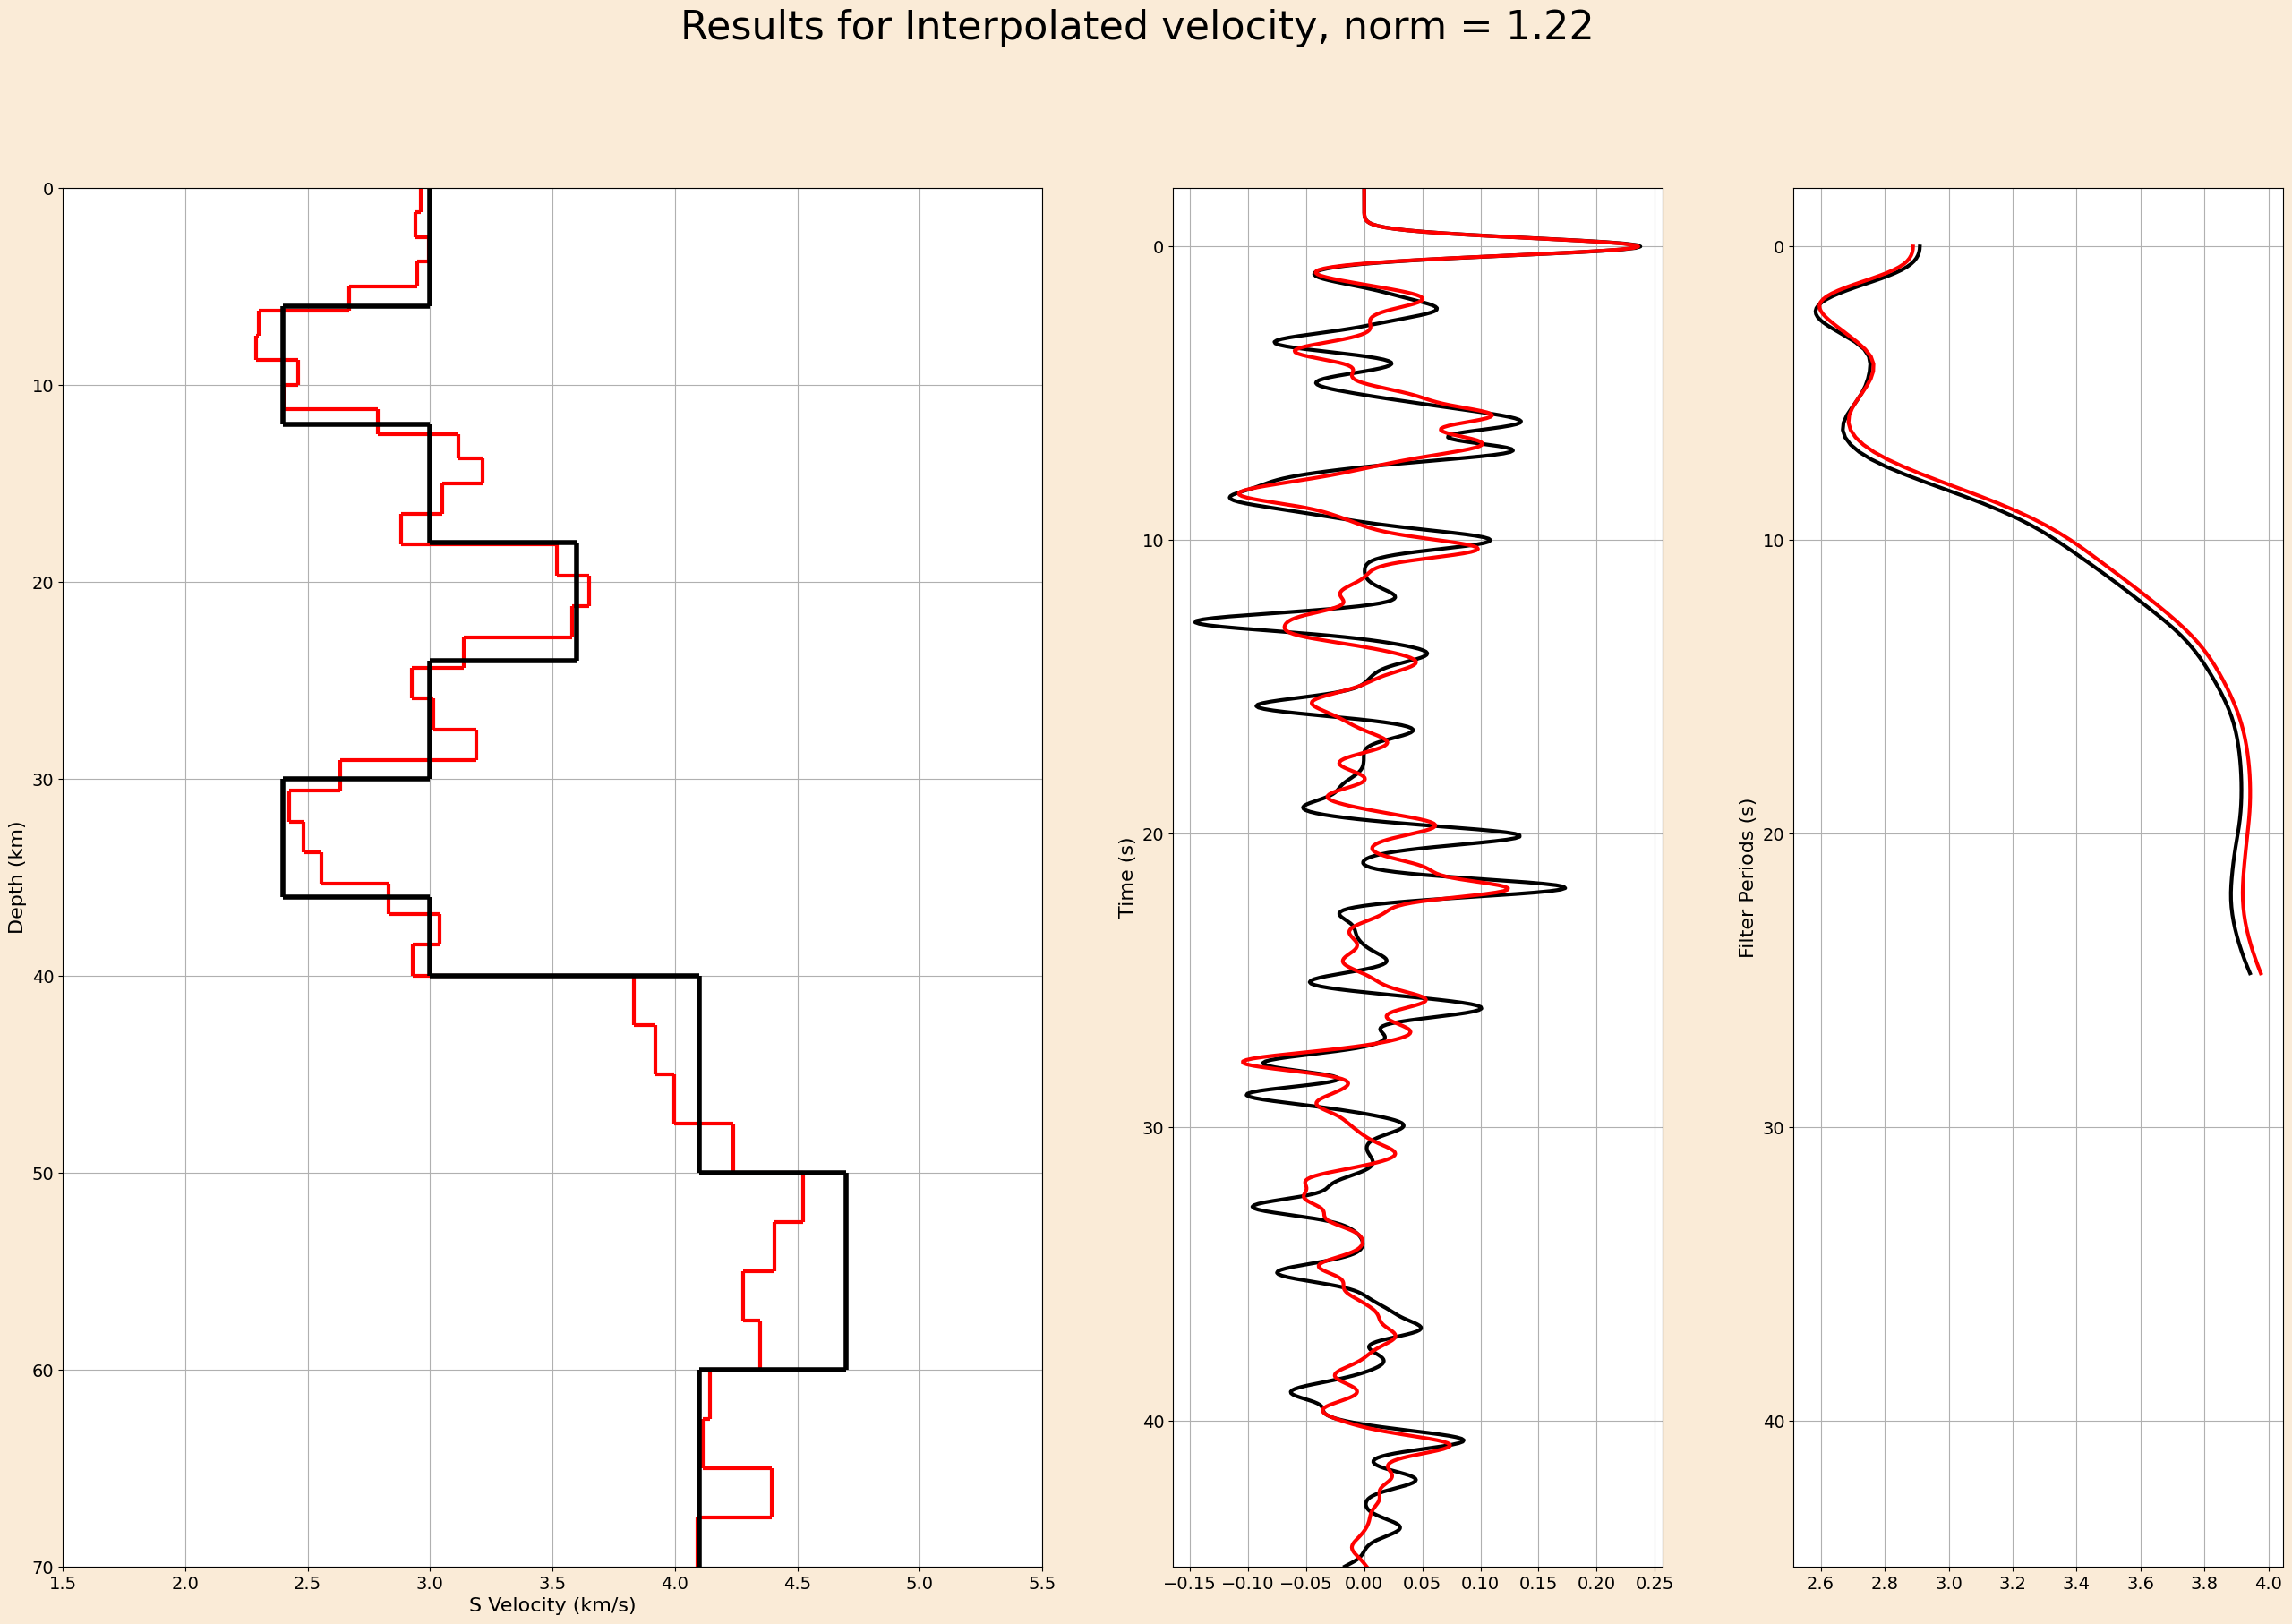

In [14]:
jrfapp_stobj.invert_data(inv_method = 'PSO',
                stack_name = 'synthetic',
                PSO_nparticle = 4, PSO_maxiter = 2, 
                nthread = 6)

saving object is same, here i save this object with another name.

In [ ]:
jrfapp_stobj_file_name = jrfapp_stobj.save_file(file_name= 'syn_no_noise_pso')

Similar to grid_search you can plot the results by:

In [ ]:
jrfapp_stobj.plot_results(fig_name= 'PSO_out.png')

and you can load this station by:

In [ ]:
jrfapp_stobj_file_name = '/home/soroush/rf_shallow_codes/makran_data/pkg_test/syn_no_noise_pso'
with open(jrfapp_stobj_file_name, 'rb') as f1:
    jrfapp_stobj = pickle.load(f1)